In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
data = pd.read_csv("./messy_data.csv")
data.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_title,emp_length,annual_inc,issue_d,loan_status,monthly_income,emp_industry,age
0,"$5,000.00",36 months,13.56,$169.83,C1,Public Affairs Specialist,10+ years,"$175,000.00",18-Aug,False,"$14,583.33",other,33
1,"$4,000.00",36 months,10.9,$130.77,B4,Reception/Sales,1 year,"$25,000.00",18-Mar,True,"$2,083.33",other,21
2,"$5,000.00",36 months,23.4,$194.60,E1,Sales,7 years,"$120,000.00",18-Jul,True,"$10,000.00",other,56
3,"$5,500.00",36 months,14.47,$189.24,C2,other,NaN,"$26,300.00",18-Dec,False,"$2,191.67",other,20
4,"$11,200.00",60 months,16.14,$273.20,C4,Engeneering,1 year,"$35,000.00",18-Aug,True,"$2,916.67",other,23


# Understanding datasets information

In [184]:
data.dtypes

 loan_amnt          object
term                object
int_rate            object
 installment        object
sub_grade           object
emp_title           object
emp_length          object
 annual_inc         object
issue_d             object
loan_status           bool
 monthly_income     object
emp_industry        object
age                  int64
dtype: object

In [185]:
data.columns

Index([' loan_amnt ', 'term', 'int_rate', ' installment ', 'sub_grade',
       'emp_title', 'emp_length', ' annual_inc ', 'issue_d', 'loan_status',
       ' monthly_income ', 'emp_industry', 'age'],
      dtype='object')

In [186]:
cols = []
for c in data.columns:
    cols.append(c.strip())
cols

['loan_amnt',
 'term',
 'int_rate',
 'installment',
 'sub_grade',
 'emp_title',
 'emp_length',
 'annual_inc',
 'issue_d',
 'loan_status',
 'monthly_income',
 'emp_industry',
 'age']

In [187]:
data.columns = cols
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_title', 'emp_length', 'annual_inc', 'issue_d', 'loan_status',
       'monthly_income', 'emp_industry', 'age'],
      dtype='object')

In [188]:
data.shape

(49524, 13)

# Explore data analysis

In [189]:
data.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_title,emp_length,annual_inc,issue_d,loan_status,monthly_income,emp_industry,age
0,"$5,000.00",36 months,13.56,$169.83,C1,Public Affairs Specialist,10+ years,"$175,000.00",18-Aug,False,"$14,583.33",other,33
1,"$4,000.00",36 months,10.9,$130.77,B4,Reception/Sales,1 year,"$25,000.00",18-Mar,True,"$2,083.33",other,21
2,"$5,000.00",36 months,23.4,$194.60,E1,Sales,7 years,"$120,000.00",18-Jul,True,"$10,000.00",other,56
3,"$5,500.00",36 months,14.47,$189.24,C2,other,NaN,"$26,300.00",18-Dec,False,"$2,191.67",other,20
4,"$11,200.00",60 months,16.14,$273.20,C4,Engeneering,1 year,"$35,000.00",18-Aug,True,"$2,916.67",other,23


## Questions

- What is the loan amount which applied by customer?
- What is the monthly income ranges?
- What is the range of loan amount which is likely to approve?
- Which grade applied loan the most?
- Does grade impact loan amount?
- Does grade impact loan interests?
- Does emp_length impact loan amount or loan interests?

### Convert currency to float

In [190]:
data.dtypes

loan_amnt         object
term              object
int_rate          object
installment       object
sub_grade         object
emp_title         object
emp_length        object
annual_inc        object
issue_d           object
loan_status         bool
monthly_income    object
emp_industry      object
age                int64
dtype: object

In [191]:
# cols = ["loan_amnt", "installment", "monthly_income", "annual_inc"]
# for c in cols:
#     print(c)
#     data[c] =  data[c].str.replace("$", "").str.replace(",", "").str.replace("unknown", "0").str.replace("\s?-\s?", "0", regex=True).astype(float)

### What is the loan amount which applied by customer?

#### Clean data


In [192]:
data["loan_amnt"] =  data["loan_amnt"].str.replace("$", "").str.replace(",", "").str.replace("unknown", "0").astype(float)

C:\Users\soven\AppData\Local\Temp\ipykernel_10984\1460526480.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["loan_amnt"] =  data["loan_amnt"].str.replace("$", "").str.replace(",", "").str.replace("unknown", "0").astype(float)


In [193]:
data.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_title,emp_length,annual_inc,issue_d,loan_status,monthly_income,emp_industry,age
0,5000.0,36 months,13.56,$169.83,C1,Public Affairs Specialist,10+ years,"$175,000.00",18-Aug,False,"$14,583.33",other,33
1,4000.0,36 months,10.9,$130.77,B4,Reception/Sales,1 year,"$25,000.00",18-Mar,True,"$2,083.33",other,21
2,5000.0,36 months,23.4,$194.60,E1,Sales,7 years,"$120,000.00",18-Jul,True,"$10,000.00",other,56
3,5500.0,36 months,14.47,$189.24,C2,other,NaN,"$26,300.00",18-Dec,False,"$2,191.67",other,20
4,11200.0,60 months,16.14,$273.20,C4,Engeneering,1 year,"$35,000.00",18-Aug,True,"$2,916.67",other,23


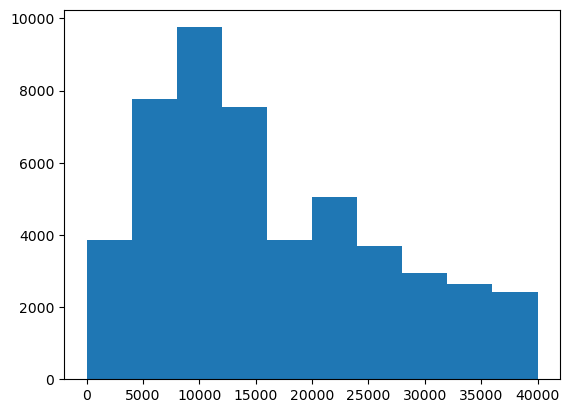

In [194]:
plt.hist(data["loan_amnt"])
plt.show()

In [195]:
data["loan_amnt"].describe()

count    49524.000000
mean     15826.665859
std      10297.121738
min          0.000000
25%       8000.000000
50%      13900.000000
75%      22000.000000
max      40000.000000
Name: loan_amnt, dtype: float64

In [196]:
print("Most frequent loan amount is from 5000$ to 15000$")

Most frequent loan amount is from 5000$ to 15000$


### What is the monthly income ranges?

In [202]:
values = []
for v in data["monthly_income"]:
    try:
        replaced = v.replace("$", "").replace(",", "").replace("-", "").strip()
        if replaced == '':
            replaced = "0"
        
        number = float(replaced)
        values.append(number)
    except Exception as e:
        print(f"value: {replaced}")
        print(f"orgin: {v}")
        print(e)
        # print(f"Error: {v}")
values[:5]

[14583.33, 2083.33, 10000.0, 2191.67, 2916.67]

In [203]:
data["monthly_income"] = values

In [204]:
data.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_title,emp_length,annual_inc,issue_d,loan_status,monthly_income,emp_industry,age
0,5000.0,36 months,13.56,$169.83,C1,Public Affairs Specialist,10+ years,"$175,000.00",18-Aug,False,14583.33,other,33
1,4000.0,36 months,10.9,$130.77,B4,Reception/Sales,1 year,"$25,000.00",18-Mar,True,2083.33,other,21
2,5000.0,36 months,23.4,$194.60,E1,Sales,7 years,"$120,000.00",18-Jul,True,10000.00,other,56
3,5500.0,36 months,14.47,$189.24,C2,other,NaN,"$26,300.00",18-Dec,False,2191.67,other,20
4,11200.0,60 months,16.14,$273.20,C4,Engeneering,1 year,"$35,000.00",18-Aug,True,2916.67,other,23


In [205]:
data.dtypes

loan_amnt         float64
term               object
int_rate           object
installment        object
sub_grade          object
emp_title          object
emp_length         object
annual_inc         object
issue_d            object
loan_status          bool
monthly_income    float64
emp_industry       object
age                 int64
dtype: object

In [ ]:
# income_str = data["monthly_income"].str.replace("$", "").str.replace(",", "").str.replace("unknown", "0").str.replace("-", "").str.replace(" ", "")
# income_str

In [ ]:
# income_str.astype(float)

In [ ]:
# income_str[income_str==''] = 0

In [ ]:
# data["monthly_income"] = income_str
# data.head()

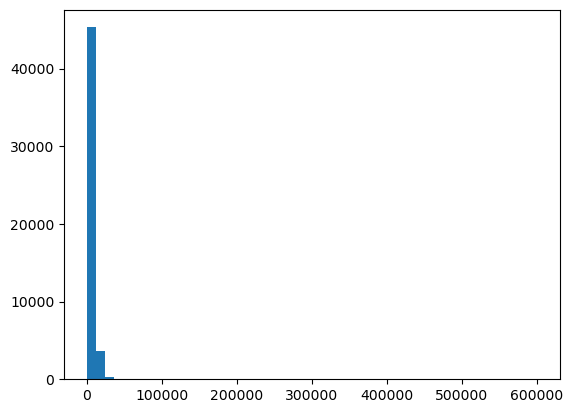

In [209]:
plt.hist(data["monthly_income"], bins=50)
plt.show()

In [213]:
filterd_income = data["monthly_income"][data["monthly_income"]<50_000]
filterd_income

0        14583.33
1         2083.33
2        10000.00
3         2191.67
4         2916.67
           ...   
49519     6666.67
49520     4000.00
49521     3500.00
49522     8000.00
49523     2083.33
Name: monthly_income, Length: 49443, dtype: float64

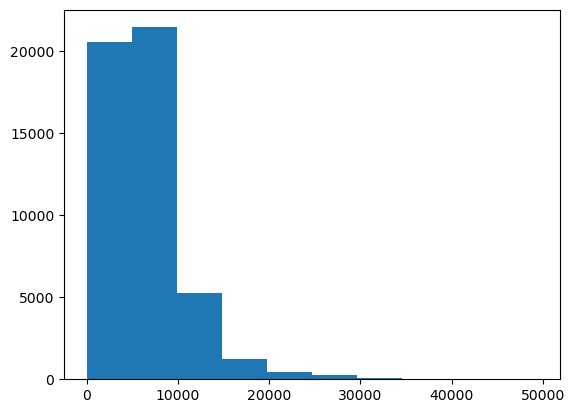

In [214]:
plt.hist(filterd_income)
plt.show()

### What is the range of loan amount which is likely to approve?

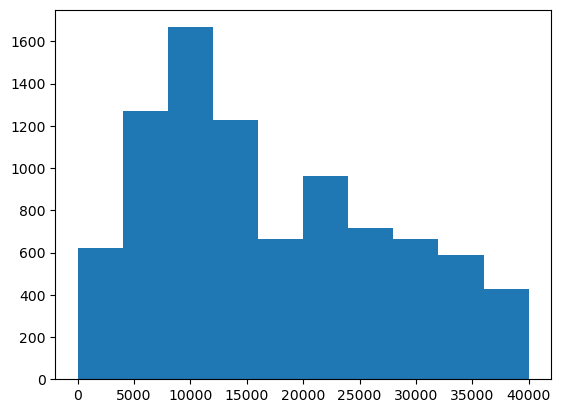

In [221]:
plt.hist(data[data["loan_status"] == True]["loan_amnt"])
plt.show()

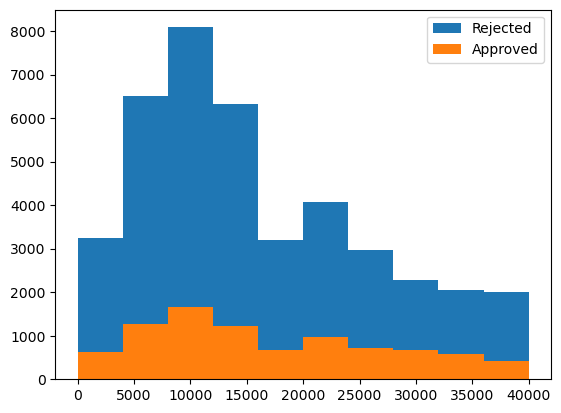

In [226]:
fig, ax = plt.subplots()
plt.hist(data[data["loan_status"] == False]["loan_amnt"], label="Rejected")
plt.hist(data[data["loan_status"] == True]["loan_amnt"], label="Approved")

ax.legend()
plt.show()

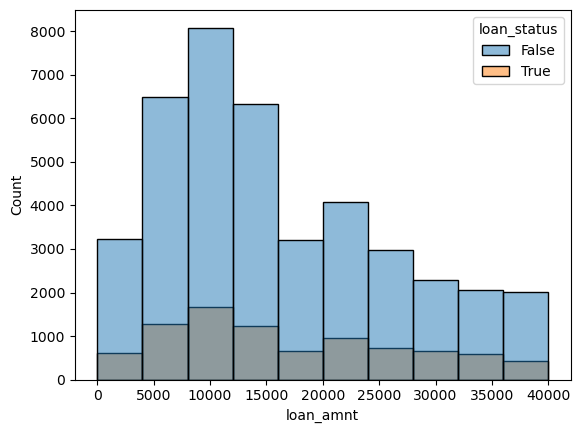

In [230]:
sns.histplot(data, x= data["loan_amnt"], hue='loan_status', bins=10)
plt.show()